# Multiplicateur de Lagrange pour Optimiser Le Dimensionnement du Projet


In [11]:
import matplotlib.pyplot as plt
import numpy as np

Nous allons optimiser la dépense du budget selon les inconnues suivantes :
x : Le nombre d’heure de développement chaque mois
y : Le nombre d’heures de machine chaque mois

In [186]:
one_dev_cost = 4000
one_host_cost = 100
budget = 50000
nb_hosts = budget / one_host_cost 

In [204]:
n = 10000  # Ratio de retour sur investissement
p = 50  # Ratio d’efficacité des dev / host

Nos possibilités maximales sont

In [187]:
host_min = 0
host_max = budget / one_host_cost

dev_min = 0
dev_max = budget / one_dev_cost

In [188]:
def n_dev(n_host, budget):
    return (budget - one_host_cost * n_host) / one_dev_cost

In [189]:
def n_host(n_dev, budget):
    return (budget - one_dev_cost * n_dev) / one_host_cost

Plotting les dépenses du budget sur une courbe

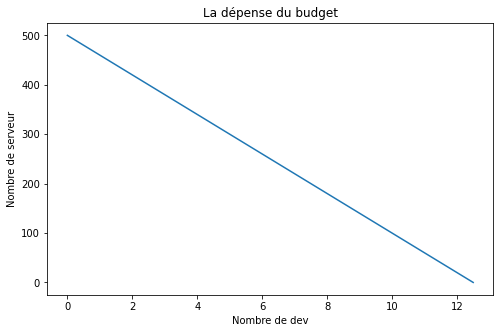

In [190]:
dev_x = np.linspace(dev_min, dev_max, 100)
host_y = n_host(dev_x, budget)

plt.figure(figsize=(8,5))
plt.plot(dev_x, host_y)
plt.xlabel('Nombre de dev')
plt.ylabel('Nombre de serveur')
plt.title('La dépense du budget')
plt.show()

In [191]:
# Les revenus

In [205]:
def revenues(dev, host):
    """Équation pragmatique qui exprime le bénéfice en 
    fonction du nombre d’heures de développement
    et du nombre d’heure de serveur utiliser."""
    return dev**((p-1)/p) * host**(1/p) * n

<ipython-input-206-9c6593fc3498>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


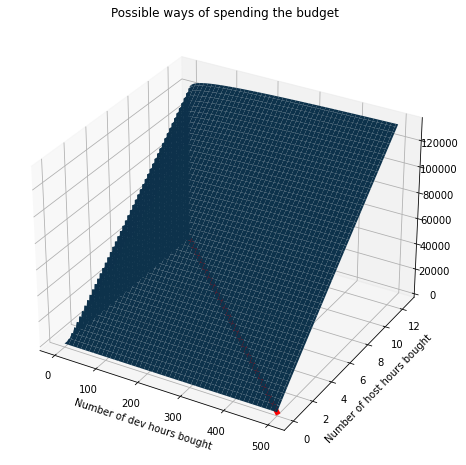

In [206]:
from mpl_toolkits.mplot3d import Axes3D
dev_axis = np.linspace(dev_min, dev_max, 100)
host_axis = np.linspace(host_min, host_max, 100)
dev_grid, host_grid = np.meshgrid(dev_axis, host_axis)

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')

ax.plot_surface(host_grid, dev_grid, revenues(dev_grid, host_grid))

ax.plot(host_y, dev_x, linewidth = 5, color = 'r')

ax.set_xlabel('Number of dev hours bought')
ax.set_ylabel('Number of host hours bought')
ax.set_title('Possible ways of spending the budget')
plt.show()



# Représentation de l’optimisation en 2 dimensions

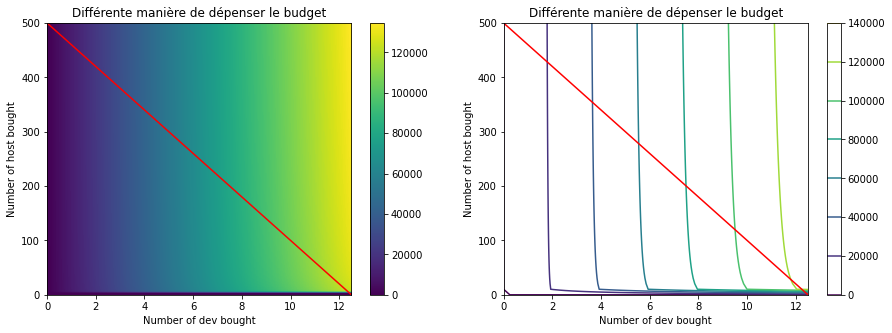

In [207]:
fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize = (15, 5))

dev_axis = np.linspace(dev_min, dev_max, 100)
host_axis = np.linspace(host_max, host_min, 100)
dev_grid, host_grid = np.meshgrid(dev_axis, host_axis)
    
im = ax_l.imshow(revenues(dev_grid, host_grid), aspect = 'auto', extent=[dev_min, dev_max, host_min, host_max])
ax_l.plot(dev_axis, n_host(dev_axis, budget), 'r')
ax_l.set_xlabel('Number of dev bought')
ax_l.set_ylabel('Number of host bought')
ax_l.set_title('Différente manière de dépenser le budget')

# Les contours montrent à quoi ressemble l’intersection

dev_axis = np.linspace(dev_min, dev_max)
host_axis = np.linspace(host_min, host_max)
dev_grid, host_grid = np.meshgrid(dev_axis, host_axis)

im2 = ax_r.contour(revenues(dev_grid,host_grid), extent=[dev_min, dev_max, host_min, host_max])
ax_r.plot(dev_axis, n_host(dev_axis, budget), 'r')
ax_r.set_xlabel('Number of dev bought')
ax_r.set_ylabel('Number of host bought')
ax_r.set_title('Différente manière de dépenser le budget')

plt.colorbar(im,ax=ax_l)
plt.colorbar(im2,ax=ax_r)

plt.show()



Visuellement le résultat le plus intéressant est celui qui est le plus tangent à la courbe, à droite de la contrainte (en rouge).

## Solution mathématique
Nous allons calculer les solutions identiques, i.e. ce que nous lisons sur le graphe ci-dessus à droite. Nous utilisons l’API de SAGEMATH avec l’option sympy pour équition diophantienne.

In [208]:
s, t, l = var('s t l')

In [209]:
n = 10000  # Ratio de retour sur investissement
p = 50  # Ratio d’efficacité des dev / host

In [201]:
solutions = solve([((n/p)*((t**(p/(p+1)))/s**(p/(p+1))) - one_host_cost*l == 0),
   ((n*p/(p+1))*(s**(1/(p+1))/t**(1/(p+1))) - one_dev_cost*l == 0),
   (one_host_cost*s+one_dev_cost*t - budget == 0)], [s,t,l], algorithm='sympy')

In [210]:
revenues(solutions[0][s], solutions[0][t]).n()

100368.149862054

In [203]:
'nombre de dev:', solutions[0][s].n(),'nombre de host :', solutions[0][t].n()

('nombre de dev:', 9.99607996863975, 'nombre de host :', 12.2500980007840)

Ce qui équivaut à un bénéfice maximum de 2804, pour 10 développeurs et 12 serveurs

In [211]:
875.n()*(25/8)^(1/4).n()*(3/8)^(3/4).n(),1875/8.n(), 25/8.n()

(557.498892840462, 234.375000000000, 3.12500000000000)

In [229]:
x,y=var('x y')

/usr/lib/python3/dist-packages/sage/plot/graphics.py:2327: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/usr/lib/python3/dist-packages/sage/plot/graphics.py:2352: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


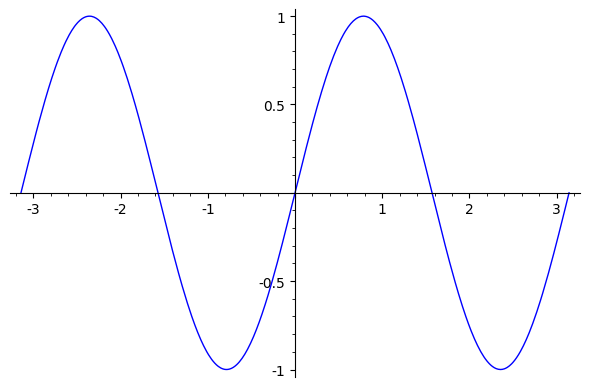

In [231]:
plot(sin(2*x), x, -pi, pi)

In [230]:
plot3d(sin(pi*sqrt(x^2 + y^2))/sqrt(x^2 + y^2), (x,-5,5), (y,-5,5))

Graphics3d Object